# Data assimilation example

This notebook is an example of data assimilation on eddies. It uses the file classes.py, eddy_prediction.py and plot.py of the project (https://github.com/lordastorios/Projet_3A_IMTA).

Autors: G. Ghienne, **A. Lefebvre, A. Lerosey, L. Menard, A. Perier.**

Note that the project use the AnDA library attached to the publication "The Analog Data Assimilation", from **R. Lguensat, P. Tandeo, and others**, submitted to the *Monthly Weather Review*.

## Initialization

We first initialize our environnement and do usefull import

In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

from eddies_prediction import create_catalog,predict_eddy,get_eddy,create_observation
from plot import StreamPlot

import matplotlib.pyplot as plt
import pandas as pd
from time import time
import numpy as np

We now define a catalog as well as some future observation from a 'catalog.csv file' (see Eddies_path.pynb).

In [2]:
dt_frame_eddies = pd.read_csv("catalog.csv",usecols=list(range(1,9)))

present_time=250
catalog_eddies = dt_frame_eddies[dt_frame_eddies.date<present_time]
observation_eddies = dt_frame_eddies[dt_frame_eddies.date>=present_time]

In [3]:
catalog_eddies

,date,id,center_x,center_y,a,b,angle,omega
0,0,1,55.182947,15.765710,0.996490,0.917343,0.359370,-0.000003
1,0,2,57.663832,16.462744,0.352356,0.901428,-2.984302,0.000004
2,1,1,55.198971,15.686171,1.061340,0.928108,0.556703,-0.000004
3,1,2,57.583567,16.511366,0.392029,0.786621,-3.020211,0.000005
4,2,1,55.053229,15.625271,1.156326,0.942291,0.322667,-0.000004
...,...,...,...,...,...,...,...,...
305,247,37,58.913502,18.313637,0.721188,0.523083,-0.769859,-0.000006
306,247,38,56.706479,15.791042,0.540009,0.429413,0.690320,0.000006
307,248,37,58.892832,18.330666,0.714539,0.468933,-0.726488,-0.000007
308,248,38,56.741122,15.765969,0.454407,0.278931,0.614330,0.000006


In [4]:
observation_eddies

,date,id,center_x,center_y,a,b,angle,omega
310,251,38,56.785602,15.808411,0.516296,0.323669,0.211564,0.000005
311,251,39,53.680723,15.809913,0.996887,0.574062,0.258787,0.000003
312,254,39,53.407239,15.561458,1.016663,0.591011,0.332640,0.000003
313,255,39,53.728347,15.752471,1.214355,0.572918,0.359747,0.000003
314,256,39,53.969910,15.876460,1.210464,0.526566,0.334790,0.000003
...,...,...,...,...,...,...,...,...
434,299,39,53.325013,14.180422,0.657028,0.336971,0.302683,0.000009
435,299,42,59.257019,17.117860,0.942245,0.712181,0.236816,-0.000005
436,299,45,60.916814,19.915934,0.541107,0.680115,2.815999,-0.000004
437,299,47,59.081684,19.062708,0.557190,0.426476,0.594118,0.000004


Let suppose we want to forecast parameters of the eddy with id=14.

In [5]:
catalog=create_catalog(catalog_eddies)
observation=create_observation(observation_eddies,id=39)

## Data Assimilation

We initialize the first eddy and define a observation noise matrix (more details and possibilities are possible, do not hesitate to read the documentation).
We can now run the data assimilation itself.

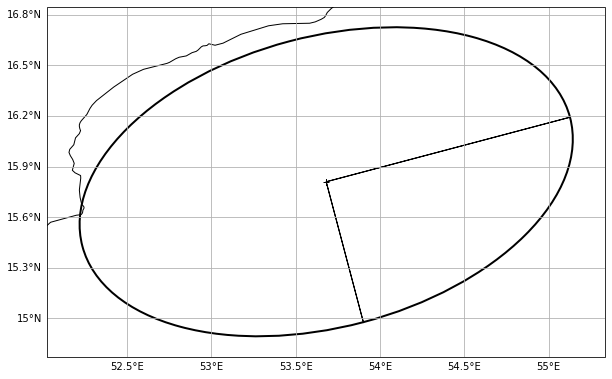

In [6]:
eddy=get_eddy(observation,0)

plt.rcParams['figure.figsize'] = 10, 10
figure=StreamPlot()
figure.plot_eddies([eddy])
figure.show()

In [7]:
R=np.eye(6)/360 #covariance of observation noise

In [8]:
prediction=predict_eddy(eddy,catalog,observation,R=R)

100%|█████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 591.93it/s]


## Results

Prediction t=0


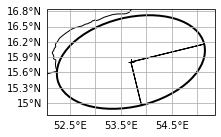

Prediction t=1


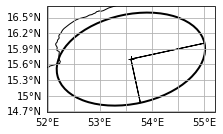

Prediction t=2


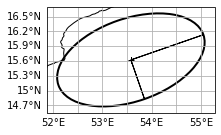

Prediction t=3


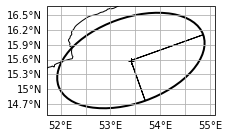

Prediction t=4


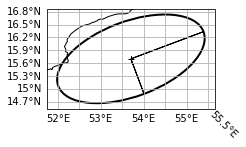

Prediction t=5


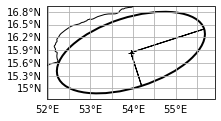

In [9]:
plt.rcParams['figure.figsize'] = 3, 3
for t in prediction.time[:6]:
    i=t-present_time-1
    eddy=get_eddy(prediction,i)
    print("Prediction t=%s"%i)
    figure=StreamPlot()
    figure.plot_eddies([eddy])
    figure.show()

We can look it parameter by parameter. For example, let focus on the first axe of the ellipse.

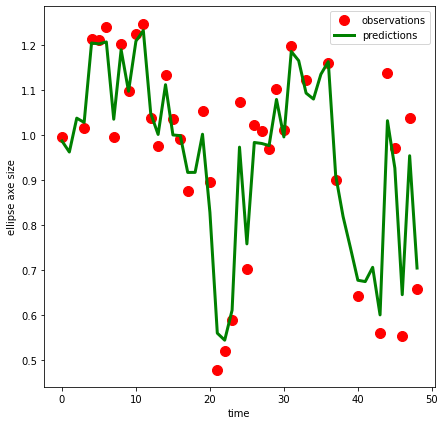

In [10]:
plt.rcParams['figure.figsize'] = 7, 7
plt.plot(observation.values[:,2],'or',markersize=10,label="observations")
plt.plot(prediction.values[:,2],'-g',linewidth=3,label="predictions")
plt.xlabel("time"),plt.ylabel("ellipse axe size"),plt.legend()
plt.show()